In [3]:
!pip install ydata-profiling
!pip install plotnine
!pip install geopy
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/17/ce/14166d0e273d12065516625fb02426350298e7b4ba59198b5fe454b46202/branca-0.7.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ----------- --------------------------- 30.7/100.0 kB 435.7 kB/s eta 0:00:01
   ------------------------------- ------- 81.9/100.0 kB 762.6 kB/s eta 0:00:01
   -------------------------------------- 100.0/100.0 kB 718.2 kB/s eta 0:00:00


In [259]:
!pip install langdetect

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     - -------------------------------------- 30.7/981.5 kB ? eta -:--:--
     -------- ----------------------------- 225.3/981.5 kB 6.9 MB/s eta 0:00:01
     ------------- ------------------------ 337.9/981.5 kB 4.2 MB/s eta 0:00:01
     -------------------- ----------------- 532.5/981.5 kB 3.7 MB/s eta 0:00:01
     ------------------------- ------------ 655.4/981.5 kB 3.8 MB/s eta 0:00:01
     --------------------------------- ---- 870.4/981.5 kB 3.7 MB/s eta 0:00:01
     --------------------------------- ---- 870.4/981.5 kB 3.7 MB/s eta 0:00:01
     --------------------------------- ---- 870.4/981.5 kB 3.7 MB/s eta 0:00:01
     --------------------------------- ---- 870.4/981.5 kB 3.7 MB/s eta 0:00:01
     -------------------------------------- 981.5/981.5 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect:

# Exploration listings - First 25 columns
This document performs a basic exploration of the listings dataset, specifically the first 25 rows. This is the largest dataset showing detailed AirBnB data for the Prague location. 

#### Based on the profiling data

##### Basic data characteristics

8949 rows.

There are less than 8% of missing observations across the entire dataset, indicating reasonably good data quality.


##### The rows in this exploration are as follows:

id - PK of the entire dataset. It will be used for joins.

listings_url - the web page linking to the accommodation in question. 

scrape_id - scrape id (composed of date and random bullshit, uniform for all)

last_scraped - when it was scraped (basically, which day it's linked to) = only one value

source - where was it scraped from (city scrape x previous scrape)?

name - name of accommodation, good source of information. Most promiment feature so far?
     
     - Composite of= "Accommodation type" - "Asterisk" (not always) - "Bedrooms" - "Beds" - "Baths" 
     
description - description from AirBnB page. Apparently also optional. But only missing in less than a few percent. Possible ftr.

neighborhood overview - description of the neighborhood environment (optional). 45% of missing observations.

picture_url - link to the picture

guest_id - unique id of the guest. Roughly a third unique. Means there are many of the same.

host_url - link to guest profile

host_name - the guest's first name

host_since - when did he start being a guest. 


host_location - the guest's residence. optional 21% missing
    
    - Format= City - Country
    
    
host_about - short descriptive info about the guest.

host_response_time - how often does the guest manage to reply? Again, an interesting feature in the questions. 12% missing. Categorical variable.

host_response_rate - what % of questions has the guest answered so far. 12% missing. Categorical variable.

host_acceptance_rate - how often the guest accepts clients. String. 7% missing.

host_is_superhost - Whether it is a superhost. It's pretty prestigious and you want it. You get better bonuses then.

    - Superhost requirements = Have 90% response rate, Max 1% cancelled bookings, at least ten stays within a year, rating 4.8+
    
host_thumbnail_url - its a thumbnail pic

host_picture_url - profile pic

host_neighborhood - neighborhood of where he lives. 7% missing.

host_listings_count - how many listings he has listed

host_total_listings_count - about the same/similar? not sure.

host_verifications - how did the guest verify?

host_has_profile_pic - true/false whether it has a profile pic

host_identity_verified - again the same boolean

neighborhood - neighborhood. optional 45% missing


## Questions? Possible features

#### 1. Are hosts who live near their AirBnB better hosts?
#### 2. Are hosts who have filled out info about themselves better hosts (hypothesis, I spend more time filling it out = I care more = I'm better))
#### 3. Do guests who have different response times behave differently? 
#### 4. Does the total number of accomodations somehow affect the price? A question for another time
#### 5. How do superhosts behave? Is there any common factor between them?
#### 6. Is it possible to somehow assign a weight to the place of residence? Is there a difference between airbnb/host/both places of residence? Maybe some sort of applet that will plot the price of rentals?
#### 7. Do guests who have been guests longer behave differently?
#### 8. Is there a difference between guests who have descriptions in English/English/Russian? 
#### 9. Is there any way to determine neighborhoodhood by something other than the text here? 

In [6]:
import pandas as pd

csv_file="C:\\Users\\blank\\DataX---Banger-Team\\Data\\listings.csv"

# Read the CSV file into a pandas DataFrame

data = pd.read_csv(csv_file, usecols=range(28))
    

In [7]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)


In [9]:
from ydata_profiling import ProfileReport
profile=ProfileReport(data,title="Exploratorka")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Dropping unnecessary columns

From the explorer we found that most of the columns do not carry any weight. We get rid of them so that we can work with only relevant data.

In [4]:
data_relevant=data[['id', 'name',"description","picture_url","host_id","host_since","host_location","host_about","host_response_time","host_acceptance_rate","host_is_superhost","host_neighbourhood","host_total_listings_count","host_verifications","host_has_profile_pic","host_identity_verified","neighbourhood_cleansed","price"]]

#### Extracting reviews

For now, we will use star ratings for quality. We first extract this from the title. It is always in the second position. Then we discretize it, giving the places without a star as a separate category.

In [5]:
data_relevant[["name",'ranking']] = data_relevant['name'].str.split('★', expand=True)
data_relevant[["ranking",'bedroom',"beds","bath"]] = data_relevant['ranking'].str.split('·', expand=True)
data_relevant['bedroom'] = data_relevant['bedroom'].str.extract('(\d+)')
data_relevant['beds'] = data_relevant['beds'].str.extract('(\d+)')
data_relevant['bath'] = data_relevant['bath'].str.extract('(\d+)')
data_relevant['ranking'].fillna(0, inplace=True)
data_relevant['ranking'] = data_relevant['ranking'].replace("New ", 0)
data_relevant['ranking'] = data_relevant['ranking'].astype(float)


C:\Users\blank\AppData\Local\Temp\ipykernel_27512\2449500192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant[["name",'ranking']] = data_relevant['name'].str.split('★', expand=True)
C:\Users\blank\AppData\Local\Temp\ipykernel_27512\2449500192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant[["name",'ranking']] = data_relevant['name'].str.split('★', expand=True)
C:\Users\blank\AppData\Local\Temp\ipykernel_27512\2449500192.py:5: SettingWithCopyWarning: 
A value is trying to b

In [10]:
data_relevant['host_location'].fillna("Prague", inplace=True)


C:\Users\blank\AppData\Local\Temp\ipykernel_21908\3193449427.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_relevant['host_location'].fillna("Prague", inplace=True)
C:\Users\blank\AppData\Local\Temp\ipykernel_21908\3193449427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['host_location'].fillna("Prague", inplace=T

#### Question 1 - Better yay or nay?

At first glance completely no? But it will still need another look.

It's interesting to compare the price x distance of the host

In [225]:
# Import libraries
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import pandas as pd

# Geocoder initialization
geolocator = Nominatim(user_agent="my_geocoder",timeout=5)

# Dictionary for storing the cache of geographic coordinates
coordinates_cache = {}

# Function to retrieve geographic coordinates for a cached location
def get_coordinates_cached(location):
    # If coordinates are cached, returns them
    if location in coordinates_cache:
        return coordinates_cache[location]
    # Otherwise, geocode and cache
    else:
        geo_location = geolocator.geocode(location)
        if geo_location:
            coordinates = (geo_location.latitude, geo_location.longitude)
            coordinates_cache[location] = coordinates
            return coordinates
        else:
            return None

# Calculate the distance for each row of the dataset using the cache
def calculate_distance_cached(row):
    coords1 = get_coordinates_cached(row["neighbourhood_cleansed"])
    coords2 = get_coordinates_cached(row["host_location"])
    if coords1 and coords2:
        return geodesic(coords1, coords2).kilometers
    else:
        return None


# Adding a column with calculated distances to the first ten rows of the dataset using cache
data_relevant["Distance"] = data_relevant.apply(calculate_distance_cached, axis=1)



C:\Users\blank\AppData\Local\Temp\ipykernel_18888\4217501669.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [226]:
data_relevant['distance_cat'] = pd.cut(data_relevant['Distance'], bins=[-float("inf"),5,30,100,float("inf")], labels=["0-5 km","5-30 km","30-100 km","100+ km"])


C:\Users\blank\AppData\Local\Temp\ipykernel_18888\3094806156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


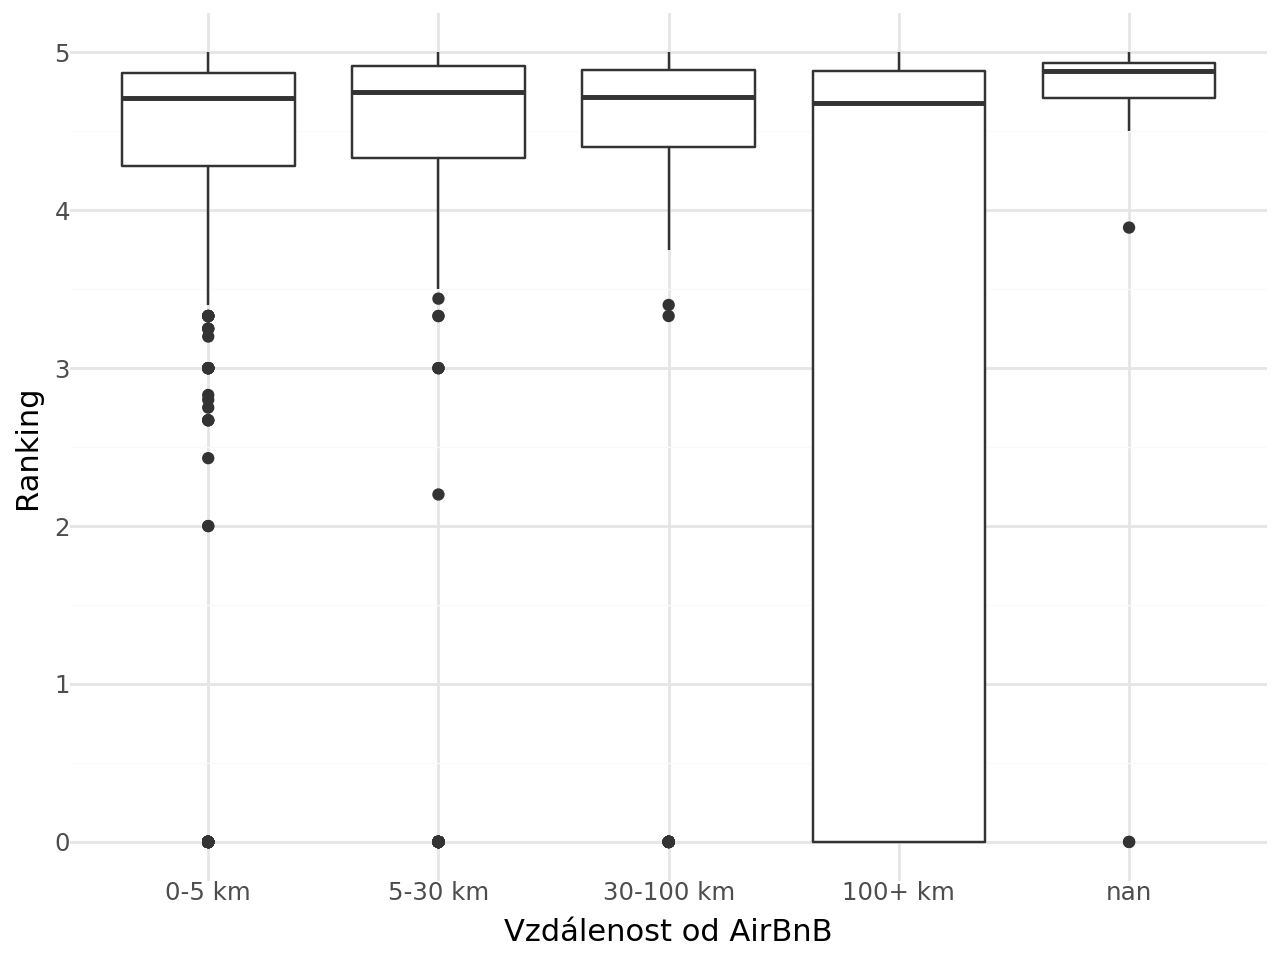

In [227]:
from plotnine import ggplot, aes, geom_boxplot, theme_minimal, labs
import pandas as pd
plot = (ggplot(data_relevant, aes(x='distance_cat', y='ranking'))
        + geom_boxplot()
        + labs(x='Vzdálenost od AirBnB', y='Ranking')
        + theme_minimal())

plot.show()

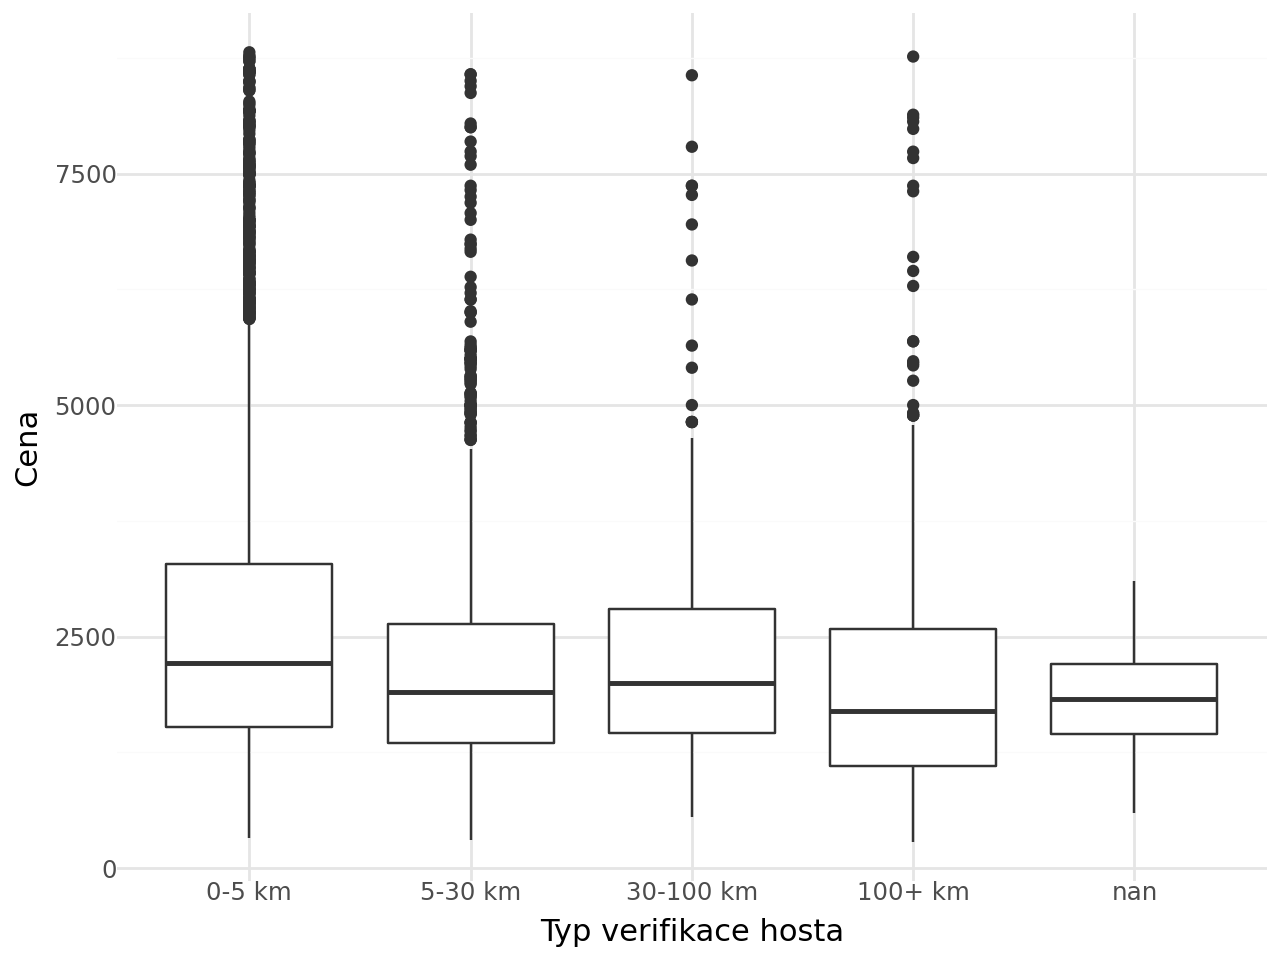

In [243]:
data_filtered = data_relevant[data_relevant['price'] < data_relevant['price'].quantile(0.95)]
plot = (ggplot(data_filtered, aes(x='distance_cat', y='price'))
        + stat_boxplot()
        + labs(x='Typ verifikace hosta', y='Cena')
        + theme_minimal())

plot.show()

#### Question 2 - How significant is verification?
It looks like verifications has a significant influence

In [11]:
import numpy as np
def create_verification_category(df):
    # Create a new column "Verification"
    data_relevant['Verification'] = ''

    # Conditions for assigning a category to the "Verification" column
    conditions = [
        (data_relevant['host_has_profile_pic'] == "t") & (data_relevant['host_identity_verified'] == "f"),
        (data_relevant['host_has_profile_pic'] == "f") & (data_relevant['host_identity_verified'] == "t"),
        (data_relevant['host_has_profile_pic'] == "t") & (data_relevant['host_identity_verified'] == "t")
    ]
    categories = ['only profile', 'only identity', 'Both']

    # Assign categories based on conditions
    data_relevant['Verification'] = pd.Categorical(
        np.select(conditions, categories, default='Unknown'),
        categories=categories,
        ordered=True
    )

# Example of using the function with an example DataFrame

create_verification_category(data_relevant)

C:\Users\blank\AppData\Local\Temp\ipykernel_21908\893204538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['Verifikace'] = ''
C:\Users\blank\AppData\Local\Temp\ipykernel_21908\893204538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['Verifikace'] = pd.Categorical(


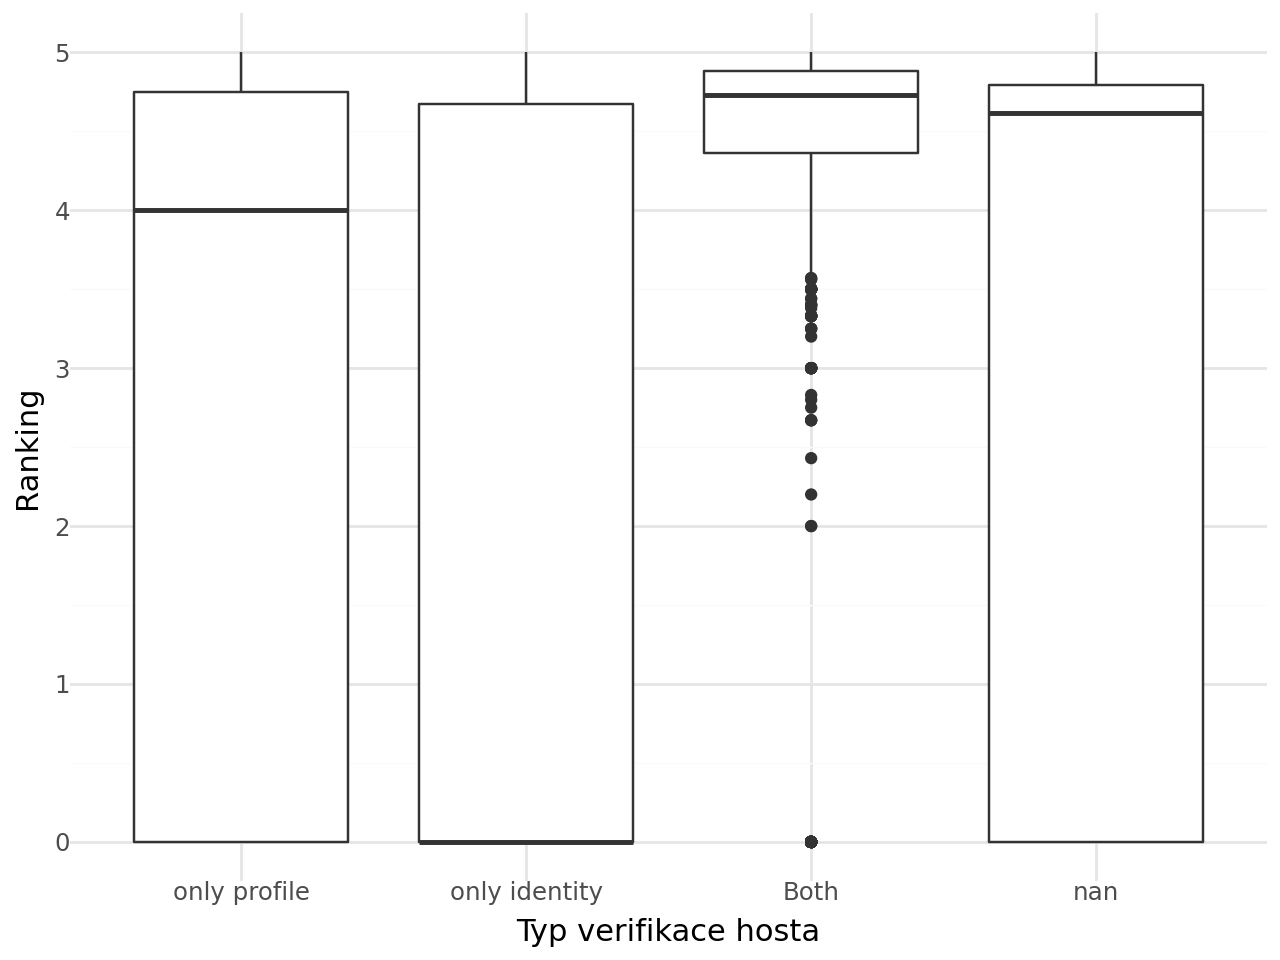

In [229]:
plot = (ggplot(data_relevant, aes(x='Verifikace', y='ranking'))
        + geom_boxplot()
        + labs(x='Typ verifikace hosta', y='Ranking')
        + theme_minimal())

plot.show()

In [12]:
data_relevant['price'] = data_relevant['price'].str.slice(start=1)
data_relevant['price'] =data_relevant['price'].str.replace(',', '').astype(float)



C:\Users\blank\AppData\Local\Temp\ipykernel_21908\3114540627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['price'] = data_relevant['price'].str.slice(start=1)
C:\Users\blank\AppData\Local\Temp\ipykernel_21908\3114540627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['price'] =data_relevant['price'].str.replace(',', '').astype(float)


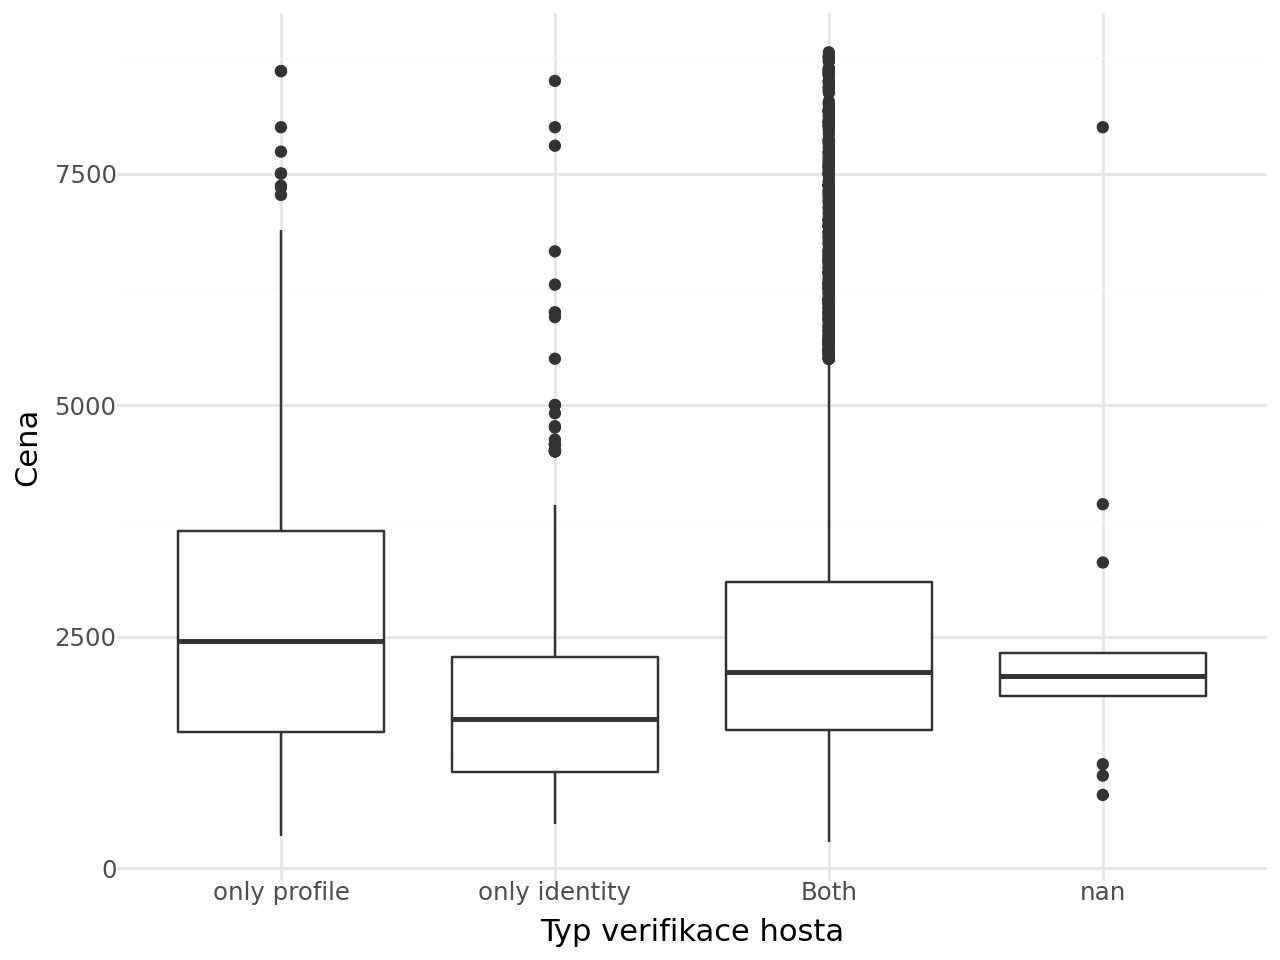

In [242]:
from plotnine import ggplot, aes, geom_boxplot,stat_boxplot, theme_minimal, labs
data_filtered = data_relevant[data_relevant['price'] < data_relevant['price'].quantile(0.95)]

plot = (ggplot(data_filtered, aes(x='Verifikace', y='price'))
        + stat_boxplot()
        + labs(x='Typ verifikace hosta', y='Cena')
        + theme_minimal())

plot.show()


#### Question 3 - Response time?

It seems, as per common sense, the worse the response time is, the worse we can expect the ranking to be.

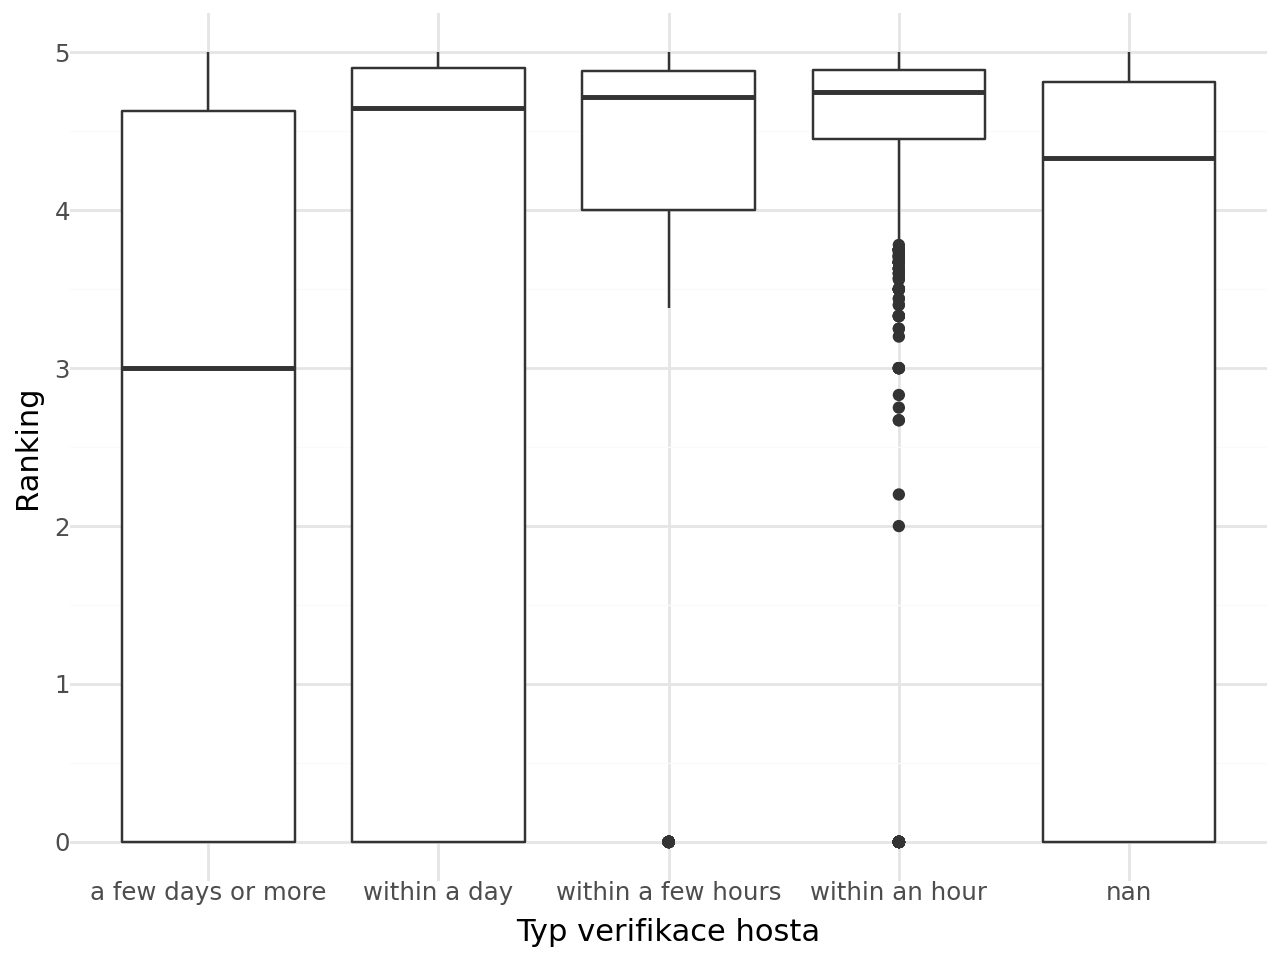

In [244]:
plot = (ggplot(data_relevant, aes(x='host_response_time', y='ranking'))
        + geom_boxplot()
        + labs(x='Typ verifikace hosta', y='Ranking')
        + theme_minimal())

plot.show()

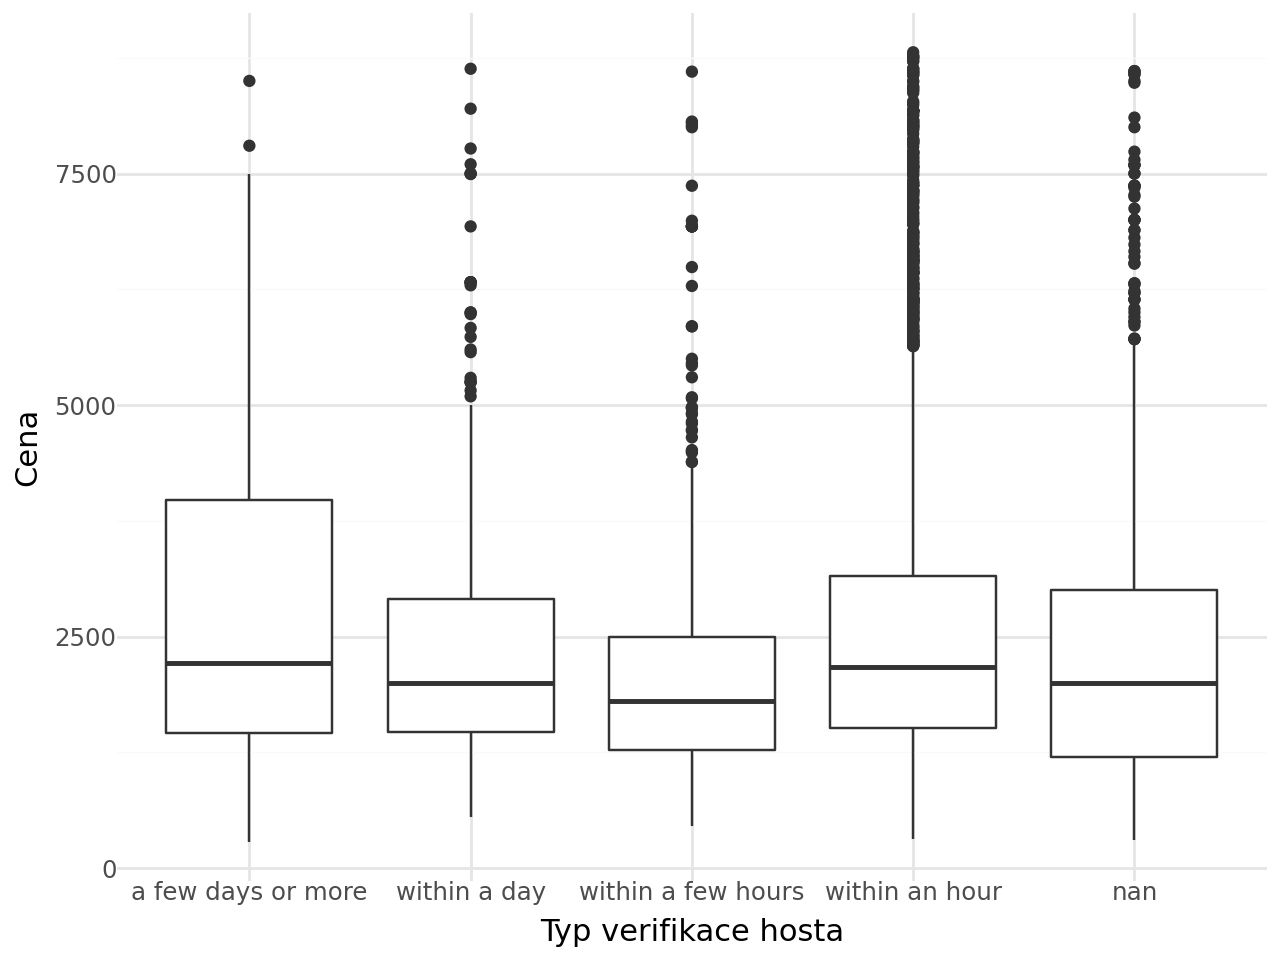

In [245]:
data_filtered = data_relevant[data_relevant['price'] < data_relevant['price'].quantile(0.95)]
plot = (ggplot(data_filtered, aes(x='host_response_time', y='price'))
        + stat_boxplot()
        + labs(x='Typ verifikace hosta', y='Cena')
        + theme_minimal())

plot.show()

#### Question 4 - Superhost

As per expectations, superhosts have a larger price variation range + have better ratings. This is needed to maintain "super" status

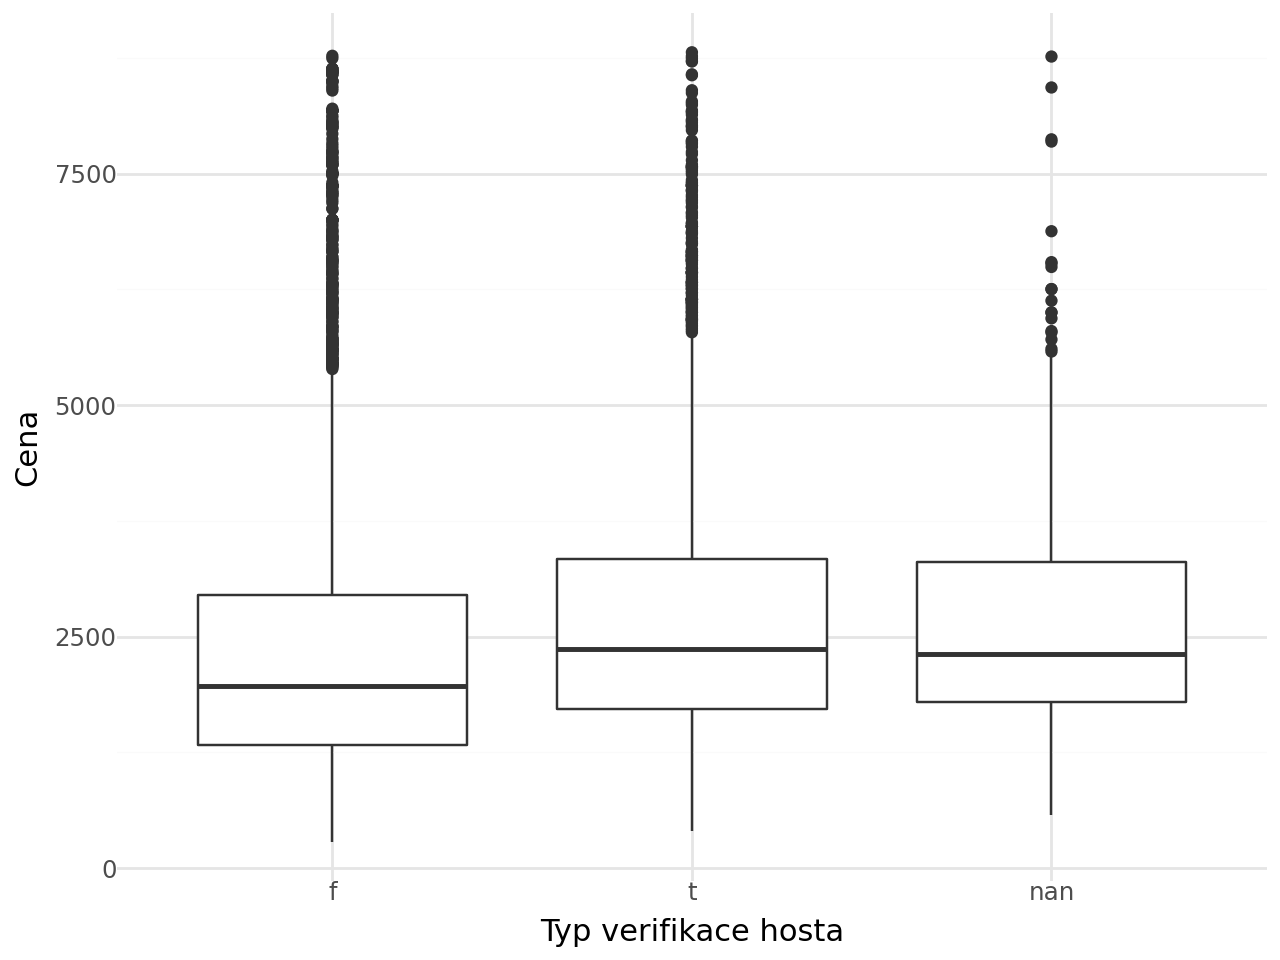

In [247]:
data_filtered = data_relevant[data_relevant['price'] < data_relevant['price'].quantile(0.95)]

plot = (ggplot(data_filtered, aes(x='host_is_superhost', y='price'))
        + stat_boxplot()
        + labs(x='Typ verifikace hosta', y='Cena')
        + theme_minimal())

plot.show()

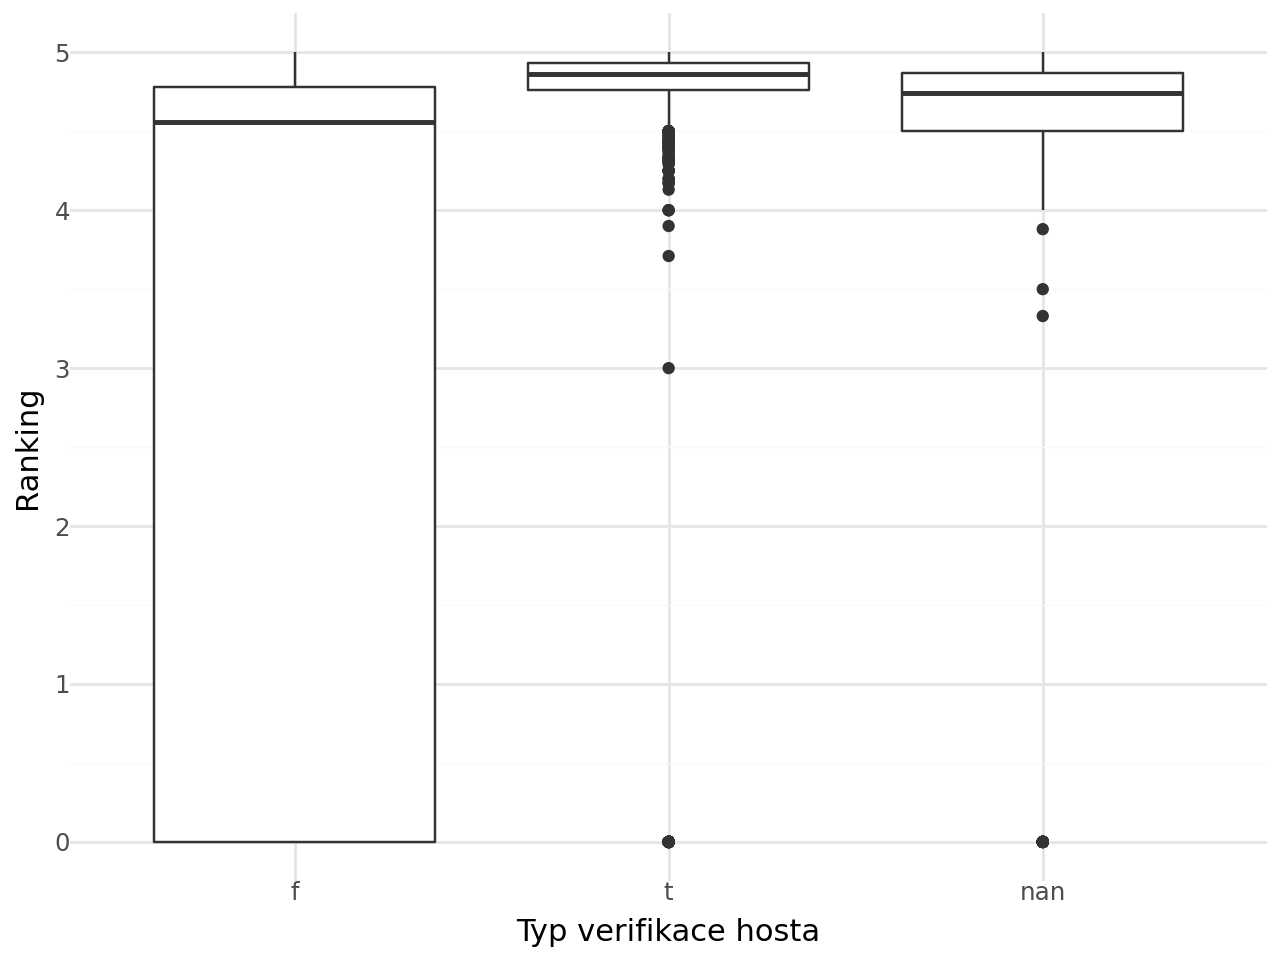

In [248]:
plot = (ggplot(data_relevant, aes(x='host_is_superhost', y='ranking'))
        + geom_boxplot()
        + labs(x='Typ verifikace hosta', y='Ranking')
        + theme_minimal())

plot.show()

#### Otázka 5 - Host since?

It seems, like it is a valuable variable. The medians are different which hints at the category being significant.

In [13]:
from datetime import datetime
data_relevant['host_since'] = pd.to_datetime(data_relevant['host_since'])

today = datetime.now()
data_relevant['months_since_hosting'] = (today.year - data_relevant['host_since'].dt.year) * 12 + (today.month - data_relevant['host_since'].dt.month)



C:\Users\blank\AppData\Local\Temp\ipykernel_21908\4035600035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['host_since'] = pd.to_datetime(data_relevant['host_since'])
C:\Users\blank\AppData\Local\Temp\ipykernel_21908\4035600035.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['months_since_hosting'] = (today.year - data_relevant['host_since'].dt.year) * 12 + (today.month - data_relevant['host_since'].dt.month)


In [14]:
data_relevant['months_since_hosting'] = pd.cut(data_relevant['months_since_hosting'], bins=[-float("inf"),12,36,60,120,float("inf")], labels=["less than year","1-3 years","3-5 years","5-10 years","10+ years"])


C:\Users\blank\AppData\Local\Temp\ipykernel_21908\213446145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant['months_since_hosting'] = pd.cut(data_relevant['months_since_hosting'], bins=[-float("inf"),12,36,60,120,float("inf")], labels=["less than year","1-3 years","3-5 years","5-10 years","10+ years"])


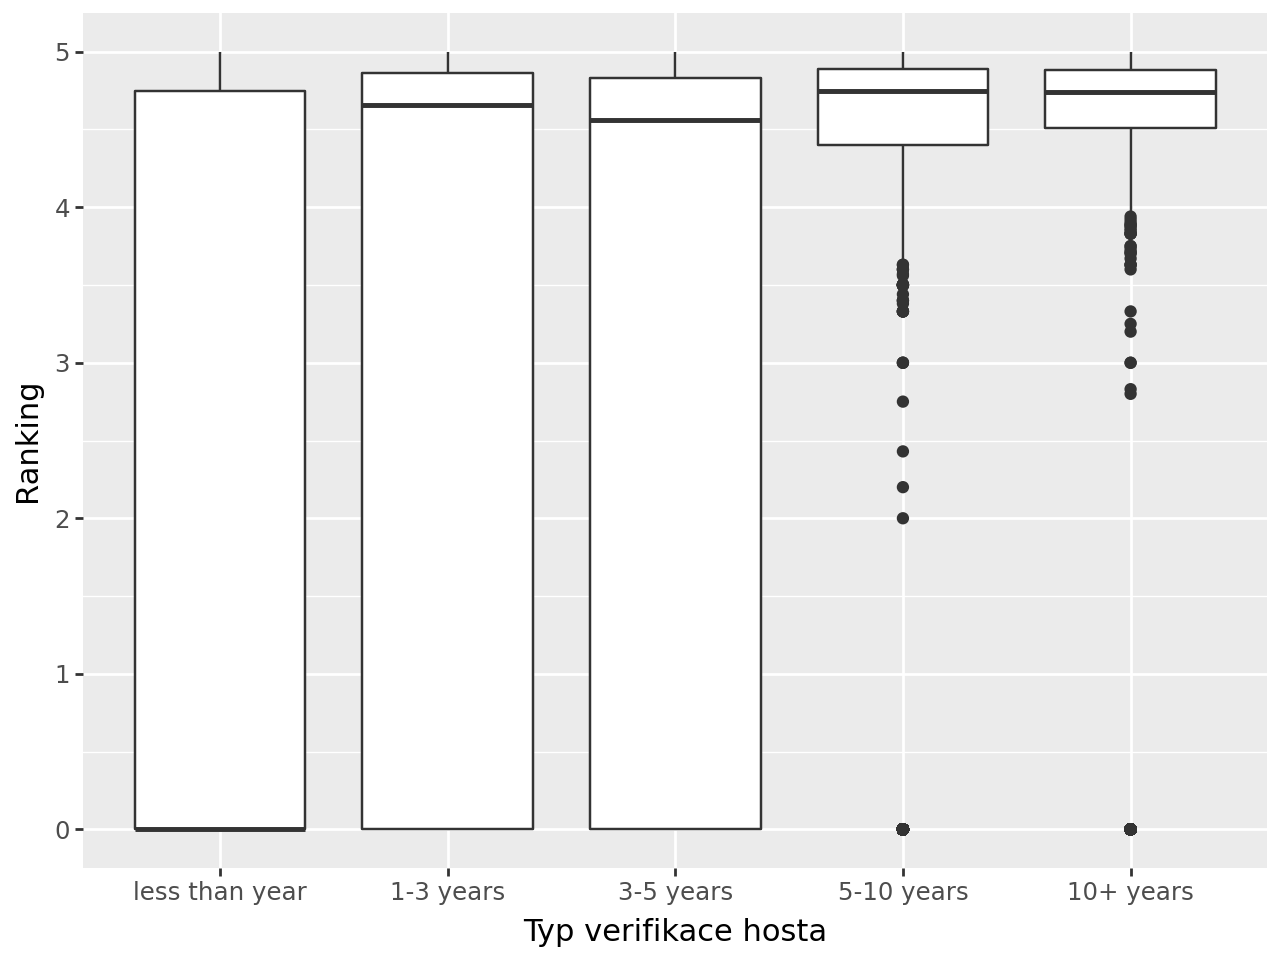

In [22]:
import plotnine
plot = (ggplot(data_relevant, aes(x='months_since_hosting', y='ranking'))
        + geom_boxplot()
        + labs(x='Typ verifikace hosta', y='Ranking')
       )
plot.show()

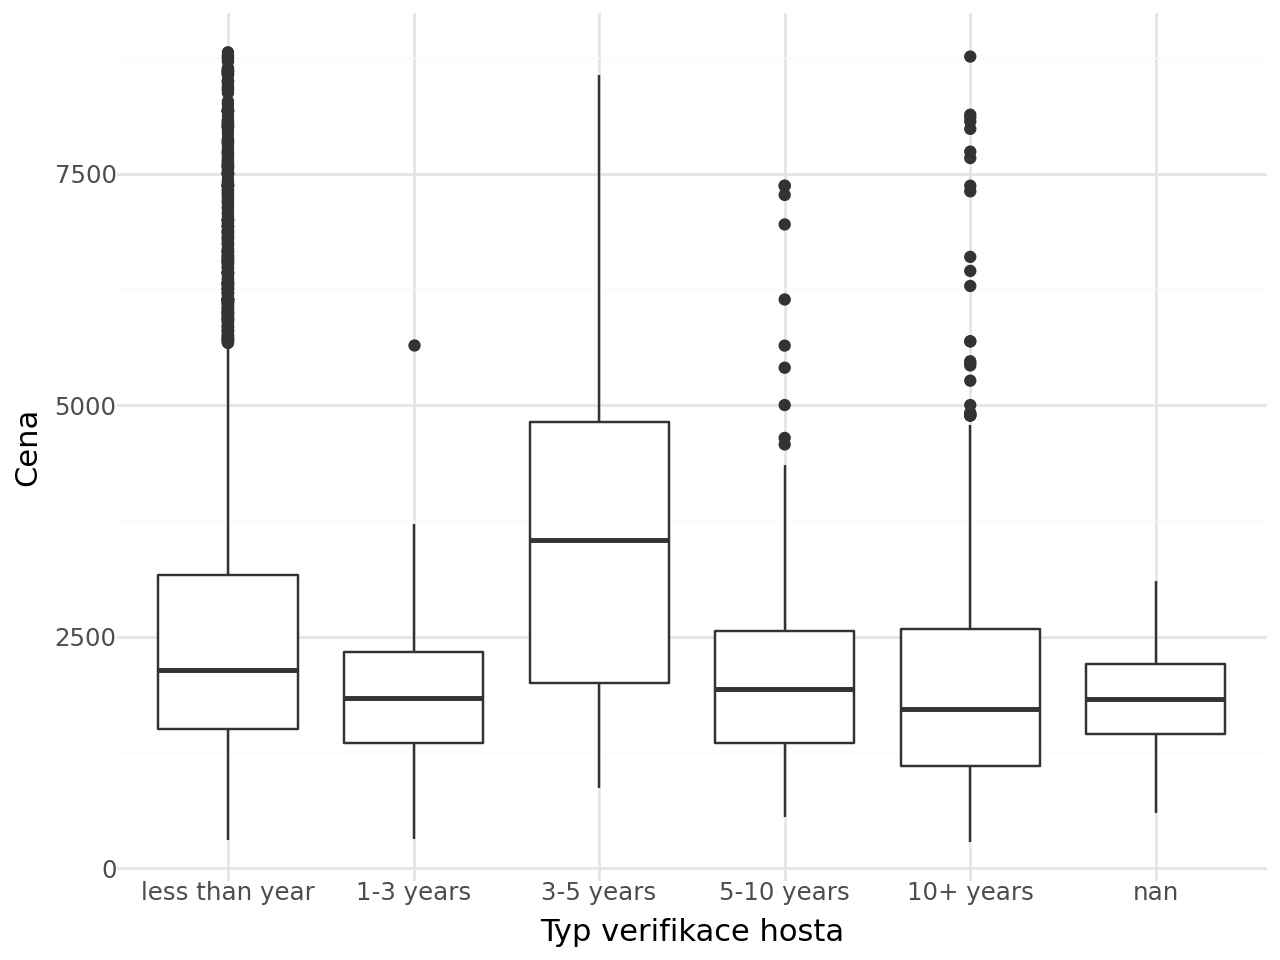

In [258]:
# Filtrujeme data bez outlierů
data_filtered = data_relevant[data_relevant['price'] < data_relevant['price'].quantile(0.95)]

# Vytvoření boxplotu pomocí plotnine
plot = (ggplot(data_filtered, aes(x='months_since_hosting', y='price'))
        + stat_boxplot()
        + labs(x='Typ verifikace hosta', y='Cena')
        + theme_minimal())

plot.show()

#### Question 6 - Language differences
Not much


In [271]:
data_relevant['description']=data_relevant['description'].astype(str)
data_relevant['language'] = data_relevant['description'].apply(lambda x: detect(x))


C:\Users\blank\AppData\Local\Temp\ipykernel_18888\1979419287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\blank\AppData\Local\Temp\ipykernel_18888\1979419287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [277]:
data_relevant.loc[~data_relevant['language'].isin(['cs', 'ru', 'en']), 'language'] = 'other'


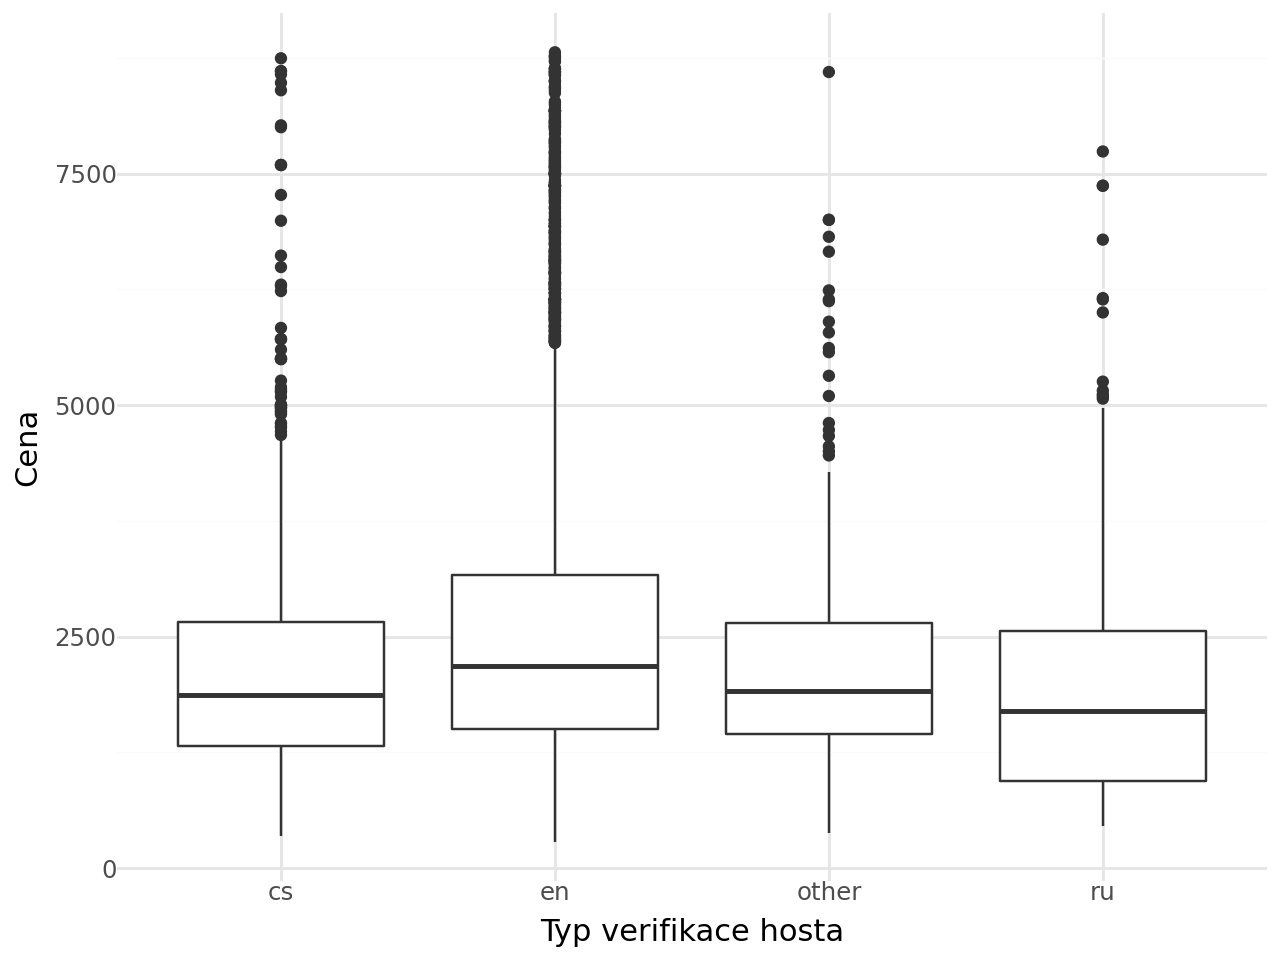

In [279]:
data_filtered = data_relevant[data_relevant['price'] < data_relevant['price'].quantile(0.95)]

plot = (ggplot(data_filtered, aes(x='language', y='price'))
        + stat_boxplot()
        + labs(x='Typ verifikace hosta', y='Cena')
        + theme_minimal())

plot.show()

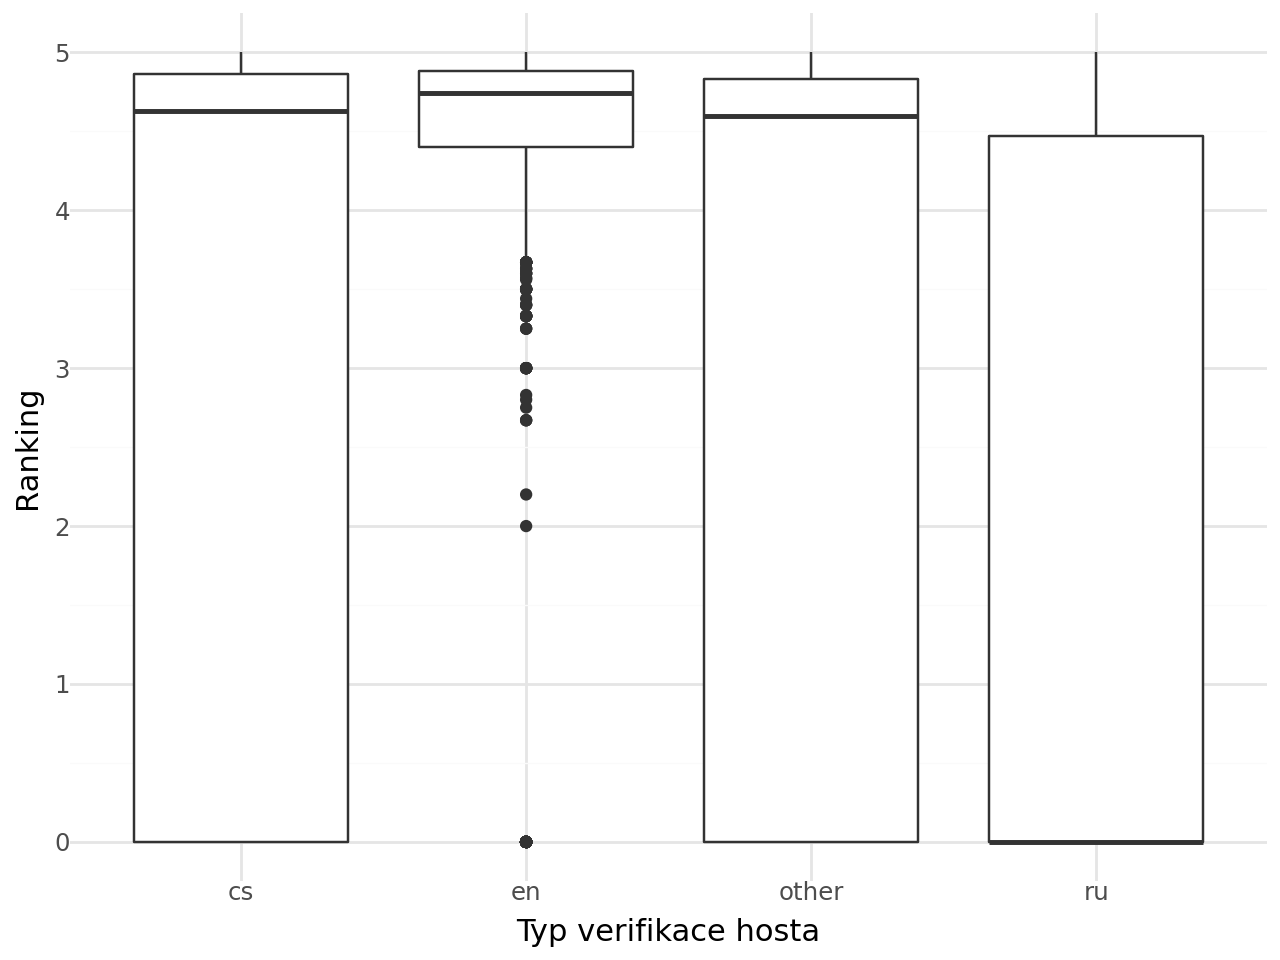

In [280]:
plot = (ggplot(data_relevant, aes(x='language', y='ranking'))
        + geom_boxplot()
        + labs(x='Typ verifikace hosta', y='Ranking')
        + theme_minimal())

plot.show()

#### Otázka 7 - Lokalita

In [23]:
locality_price_dict = {
    'Praha 1': 45250,
    'Praha 2': 36476,
    'Praha 3': 27046,
    'Praha 4': 22689,
    'Praha 5': 28731,
    'Praha 6': 28304,
    'Praha 7': 33077,
    'Praha 8': 23610,
    'Praha 9': 21064,
    'Praha 10': 23776,
}

def add_locality_price(locality):
    if locality in locality_price_dict:
        return locality_price_dict[locality]
    else:
        return None

data_relevant['locality_price'] = data_relevant['neighbourhood_cleansed'].map(add_locality_price)


C:\Users\blank\AppData\Local\Temp\ipykernel_21908\3089171577.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
data_relevant['locality_price'] = data_relevant['locality_price'] / 23.7


C:\Users\blank\AppData\Local\Temp\ipykernel_21908\966833729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


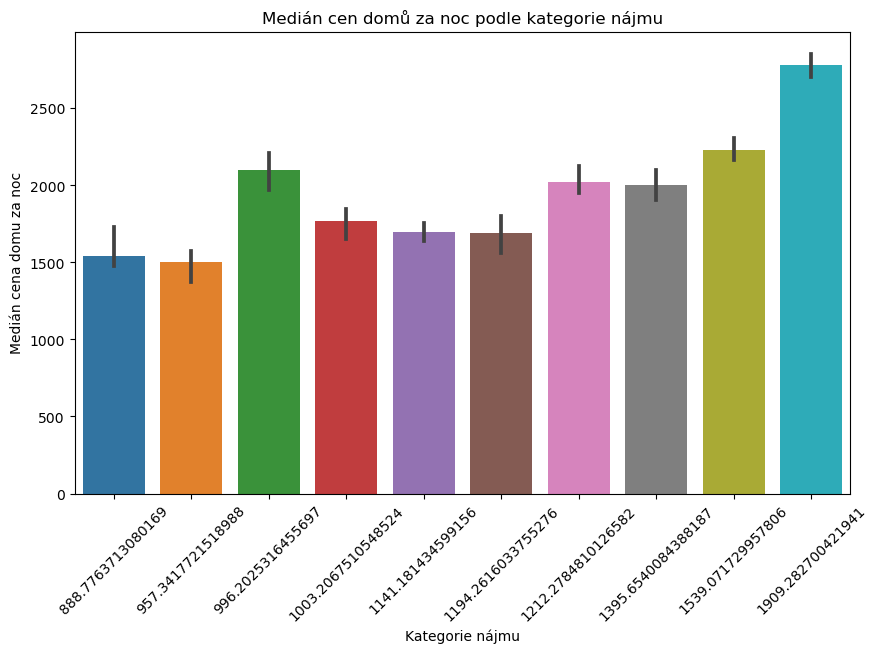

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x="locality_price", y='price', data=data_relevant, estimator=np.median)
plt.title('Medián cen domů za noc podle kategorie nájmu')
plt.xlabel('Kategorie nájmu')
plt.ylabel('Medián cena domu za noc')
plt.xticks(rotation=45)  # Otočení popisků na x-ové ose pro lepší čitelnost
plt.show()
